## Khaled Sharafaddin - CreditCard Users Churn Prediction

Description
Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio




### 1. Load libraries and view the dataset

In [1]:
# This allows each cell to output everything instead of just the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Load libraries and dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from os import system 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,)
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# 2. Look at the data
BankChurners = pd.read_csv('/Users/khaledsharafaddin/Documents/Univ_Austin_Texas ML_AI/DataSets/BankChurners.csv')
BankChurners.head()
BankChurners.info()

# 3. Check the total null (only Unnamed21 column) and the shape of the data
BankChurners.isnull().sum()/BankChurners.shape[0]*100
BankChurners.shape   # (10127, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(10127, 22)

### 2. Exploratory Data Analysis

In [2]:
# 2.1 Look at percentages and value counts

cat = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 
             'Card_Category']
for i in cat:
    print(i)
    BankChurners[i].value_counts()/BankChurners.shape[0]*100


Attrition_Flag


Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Gender


F    52.908068
M    47.091932
Name: Gender, dtype: float64

Education_Level


Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: Education_Level, dtype: float64

Marital_Status


Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64

Income_Category


Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64

Card_Category


Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

Credit_Limit


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

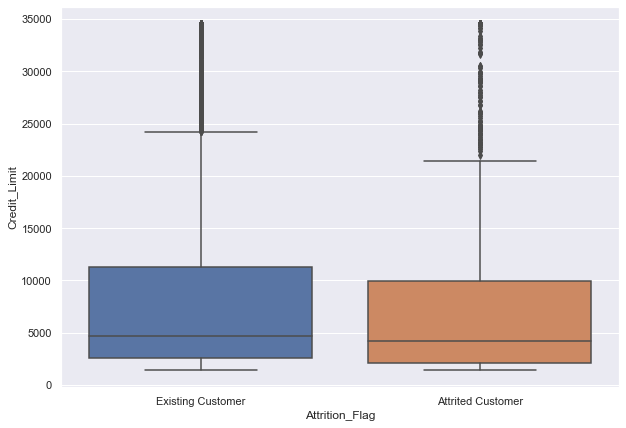

Avg_Utilization_Ratio


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

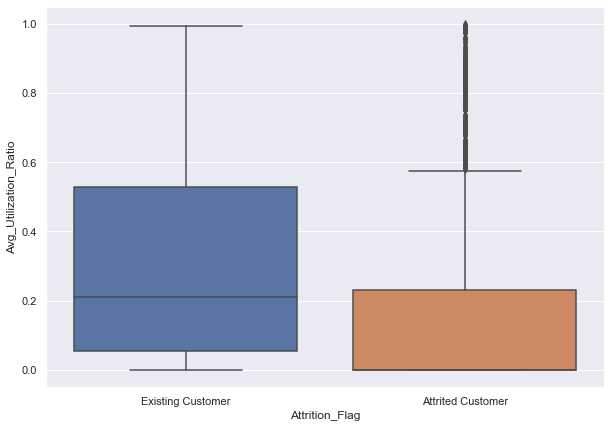

Months_Inactive_12_mon


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

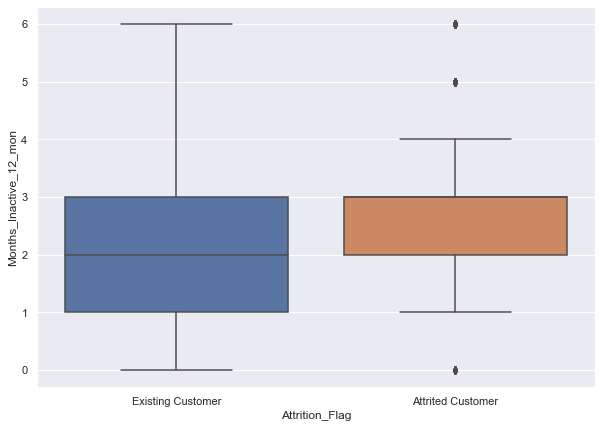

Total_Revolving_Bal


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

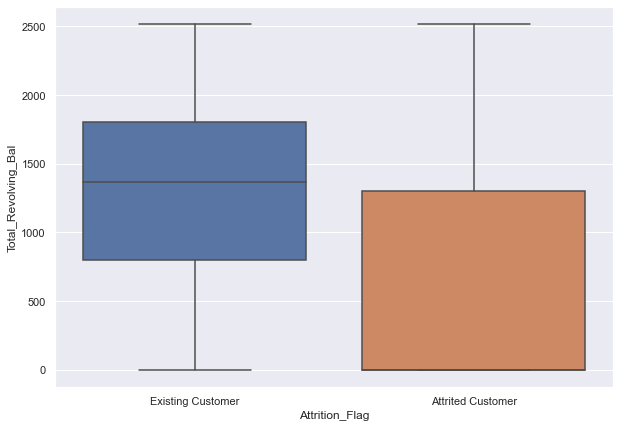

In [3]:
# 2.2 Bivariate Analysis

# Boxplot for Attrition_Flag and numeric variables to see relationships

# Credit_Limit
print('Credit_Limit')
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=BankChurners, orient="vertical")
plt.show()

#  Avg_Utilization_Ratio
print('Avg_Utilization_Ratio')
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=BankChurners, orient="vertical")
plt.show()


print('Months_Inactive_12_mon')
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=BankChurners, orient="vertical")
plt.show()

# Total_Revolving_Bal
print('Total_Revolving_Bal')
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=BankChurners, orient="vertical")
plt.show()


Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


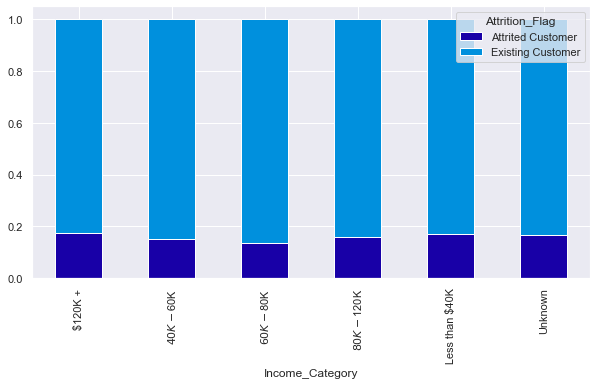

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


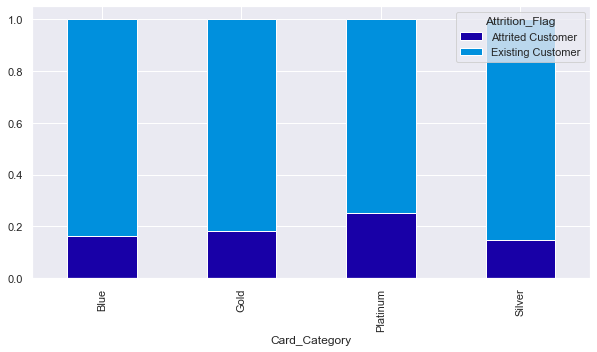

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,NaN
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,NaN
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,NaN
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,NaN
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,NaN
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,NaN
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,NaN
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,NaN
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,NaN
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,NaN


<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

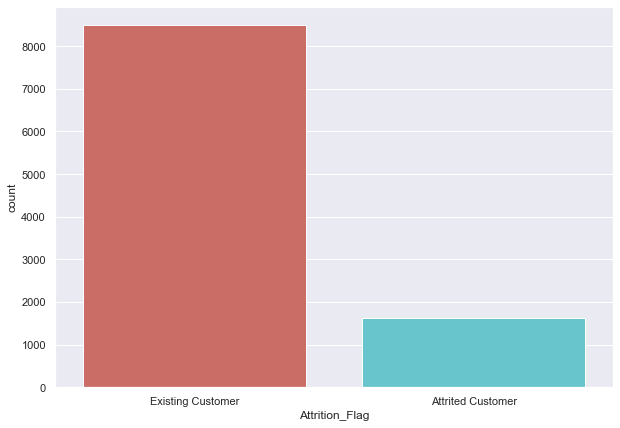

<AxesSubplot:>

Text(0.5, 1.0, 'Histogram of Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

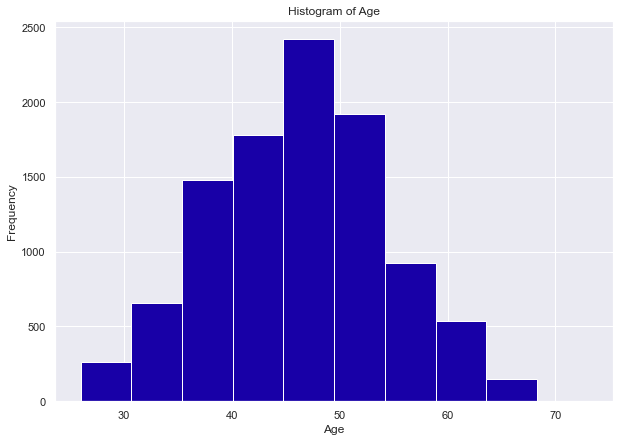

In [4]:
# 2.3 Relationships between Attrition flag and categorical variables:

## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, BankChurners["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, BankChurners["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.show()
    
stacked_plot(BankChurners["Income_Category"])

stacked_plot(BankChurners["Card_Category"])


# 2.4 Correlation R_square
BankChurners.corr()

# Attrition_Flag is imbalanced:
sns.countplot(x='Attrition_Flag', data=BankChurners, palette='hls')
plt.show()

# Age historgram
BankChurners.Customer_Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')



### EAD Insights:
- 83.9% of customers are Existing customers, while only 16% are attrited customers. There is a high level of class imbalance
- The gender category is balanced 
- Approx. 50% of customers have attended college or higher education, while only 28% are either uneducated or unknown
- The majority of customers are either married or single
- 52% of customers make 60,000 dollars or less, while small number make higher than 120,000 dollars in income
- 93% of customers are in the Blue card category. 
- Credit limit is slightely lower for attrited customers than existing ones.
- the Average untilization ratio for existing customers is higher than attrited ones.
- One year month inactive for existing customers are lower than attrited ones. 
- total revolving balance for existing customers are higher than attrited ones.
- We can see that 
- It seems that there is not a statistically significant relationship between income and attrition category. However, most of the attritied customers have platinum cards. 
- There is a strong correlation of 79% between customer age and months on book. 
- There is also  a very strong correlation of 99% between credit limit and Open to Buy Credit Line
- Customer_Age is uniform and symmetric. 


### 3. Data Cleaning and Preperation

In [5]:
# 1. Remove CLIENTNUM and Unnamed: 21 from the dataset since they are not useful in predictions
BankChurners = BankChurners.drop(['CLIENTNUM','Unnamed: 21'], axis=1)

# 2. Convert Object categories into categorical type
BankChurners[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 
             'Card_Category']] = BankChurners[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 
             'Card_Category']].astype('category')


# 3. Hot-Encode caterogical variables 

# Gender, Attrition_Flag, Marital_Status will be hot-encoded since the rank might not be important
# Education_Level, Income_Category, Card_Category will be replaced by numbers since rank is important 

BankChurners = BankChurners.replace({'Education_Level':{'Doctorate':0,'Graduate':1, 'Post-Graduate':2,
'College':3, 'High School':4, 'Unknown':5, 'Uneducated':6},
'Income_Category':{'Less than $40K':0, '$40K - $60K':1, '$80K - $120K':2, '$60K - $80K':3, 'Unknown':4,'$120K +':5},
'Card_Category':{'Blue':0, 'Silver':1, 'Platinum':2,'Gold':3},
'Attrition_Flag':{'Existing Customer':0, 'Attrited Customer':1}})

# 4. These categories are not ordered so we can do dummy variables for them
oneHotCols=['Gender', 'Marital_Status']
BankChurners = pd.get_dummies(BankChurners, columns=oneHotCols)


### 4. Split the Dataset

In [6]:
# Split Data into training and testing

X = BankChurners.drop(["Attrition_Flag"], axis=1)
y = BankChurners["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)


(7088, 23) (3039, 23)


### 5. Over-Sample The Attrition_Flag using SMOTE
- SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
- Creates synthetic samples from the minor class (Attrited == 1) 
- Randomly choose one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [7]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number records X_train dataset: ", X_train.shape)
print("Number records y_train dataset: ", y_train.shape)
print("Number records X_test dataset: ", X_test.shape)
print("Number records y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("% Before OverSampling, counts of label '1': {}".format(sum(y_train==1)/len(y_train)))
print("% Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)/len(y_train)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("% After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)/len(y_train)))
print("% After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)/len(y_train)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Number records X_train dataset:  (7088, 23)
Number records y_train dataset:  (7088,)
Number records X_test dataset:  (3039, 23)
Number records y_test dataset:  (3039,)
Before OverSampling, counts of label '1': 1171
Before OverSampling, counts of label '0': 5917 

% Before OverSampling, counts of label '1': 0.16520880361173815
% Before OverSampling, counts of label '0': 0.8347911963882618 

After OverSampling, the shape of train_X: (11834, 23)
After OverSampling, the shape of train_y: (11834,) 

% After OverSampling, counts of label '1': 0.8347911963882618
% After OverSampling, counts of label '0': 0.8347911963882618
After OverSampling, counts of label '1': 5917
After OverSampling, counts of label '0': 5917


In [8]:
#  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores


## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### which metric is right for model? 
- We are interested in finding customers who may churn from using credit cards.
- The dataset has class imbalance. Approx. 84% are existing customers, and therefore accuracy is not a good measure.
- Precision is a good measure here, because The Thera bank should aim at  finding customers who might churn.

### 1. Logistic Regression with GridSearchCV:

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=1))]),
             param_grid={'logisticregression__C': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.27...
       0.541, 0.551, 0.561, 0.571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
                         'logisticregression__penalty': ['l1', 'l2']},
             scoring=make_scorer(recall_score))

Tuned Hyperparameters for logistic Regression:  {'logisticregression__C': 0.16099999999999998, 'logisticregression__penalty': 'l2'}


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.16, random_state=1))])

Accuracy on training set :  0.8955981941309256
Accuracy on test set :  0.8914116485686081
Recall on training set :  0.7224594363791631
Recall on test set :  0.7127192982456141
Precision on training set :  0.6708961141950832
Precision on test set :  0.6202290076335878


[0.8955981941309256,
 0.8914116485686081,
 0.7224594363791631,
 0.7127192982456141,
 0.6708961141950832,
 0.6202290076335878]

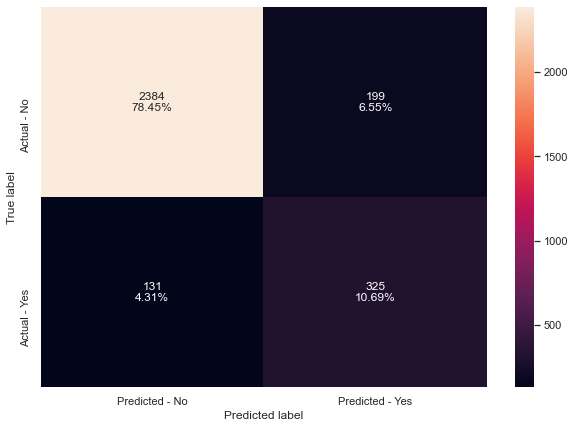

In [10]:
log_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

param_grid ={"logisticregression__C":np.arange(0.001, 1, 0.01),
      "logisticregression__penalty":["l1","l2"]} # l1 lasso l2 ridge

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

log_reg_cv = GridSearchCV(estimator=log_pipe, param_grid=param_grid,scoring=scorer ,cv=10)
log_reg_cv.fit(X_train_res, y_train_res)

# Best Hyperparameter for log_reg
log_reg_best_params = log_reg_cv.best_params_
print('Tuned Hyperparameters for logistic Regression: ', log_reg_cv.best_params_)

log_reg_tuned = make_pipeline(StandardScaler(),LogisticRegression(random_state=1,C= 0.160, penalty='l2')) 
log_reg_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(log_reg_tuned)
make_confusion_matrix(log_reg_tuned, y_test)



### 2. Logistic Regression with RandomizedSearchCV

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression(random_state=1))]),
                   n_iter=100,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd324c74390>,
                                        'logisticregression__penalty': ['l1',
                                                                        'l2']})

Best hyperparameters for the logistic regression:  {'logisticregression__C': 2.538711213443996, 'logisticregression__penalty': 'l2'}


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=2.5792518191315543, random_state=1))])

Accuracy on training set :  0.8961625282167043
Accuracy on test set :  0.8933859822309971
Recall on training set :  0.7224594363791631
Recall on test set :  0.7127192982456141
Precision on training set :  0.6730310262529833
Precision on test set :  0.6274131274131274


[0.8961625282167043,
 0.8933859822309971,
 0.7224594363791631,
 0.7127192982456141,
 0.6730310262529833,
 0.6274131274131274]

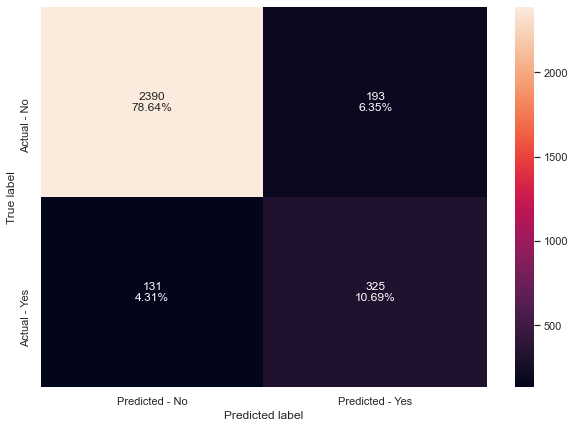

In [11]:

from scipy.stats import uniform

rand_logistic_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))
param_grid = {
    'logisticregression__C': uniform(loc=0, scale=4), # regularization hyperparameter distribution using uniform distribution
    'logisticregression__penalty':['l1', 'l2']
}

# Create RandomizedSearchCV
log_clf = RandomizedSearchCV(rand_logistic_pipe, param_grid, n_iter=100, cv=10)
log_clf.fit(X_train_res, y_train_res)

# best parameters:
print('Best hyperparameters for the logistic regression: ', log_clf.best_params_)

rand_logistic_tuned_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, C=2.5792518191315543, penalty= 'l2'))
rand_logistic_tuned_pipe.fit(X_train_res, y_train_res)

# Calculating different metrics
get_metrics_score(rand_logistic_tuned_pipe)
# Creating confusion matrix
make_confusion_matrix(rand_logistic_tuned_pipe, y_test)




### 3. Decision tree using Pipeline and GridSearchCV 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=1))]),
             param_grid={'decisiontreeclassifier__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__max_leaf_nodes': [2, 3, 5,
                                                                    10],
                         'decisiontreeclassifier__min_impurity_decrease': [0.001,
                                                                           0.01,
                                                                           0.1],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 5,
                                                                      7, 10, 15,
                                                                      20]},
             scoring=make_

Tuned Hyperparameters for DTree Classifier:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                                        min_impurity_decrease=0.001,
                                        random_state=1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('decisiontreeclassifier',
                                  DecisionTreeClassifier(max_depth=3,
                                                         max_leaf_nodes=5,
                                                         min_impurity_decrease=0.001,
                                                         random_state=1))]))])

Accuracy on training set :  0.7491534988713319
Accuracy on test set :  0.7568279039157617
Recall on training set :  0.9402220324508966
Recall on test set :  0.9671052631578947
Precision on training set :  0.3919544321822713
Precision on test set :  0.3785407725321888


[0.7491534988713319,
 0.7568279039157617,
 0.9402220324508966,
 0.9671052631578947,
 0.3919544321822713,
 0.3785407725321888]

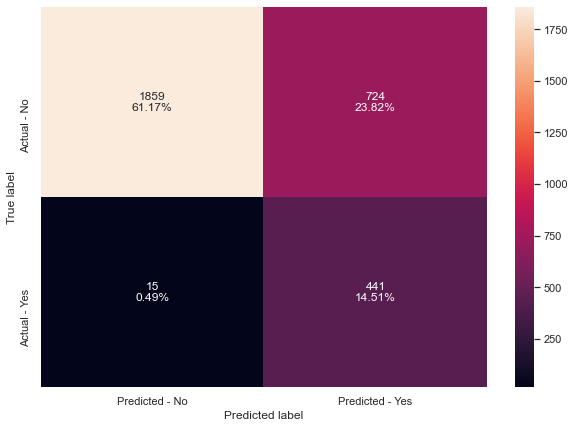

In [12]:

Dtree_pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

parameters = {'decisiontreeclassifier__max_depth': np.arange(1,10), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.precision_score)

Dtree_cv = GridSearchCV(estimator=Dtree_pipe, param_grid=parameters,scoring=scorer ,cv=10)
Dtree_cv.fit(X_train_res, y_train_res)


# Best Hyperparameter for DTree
Dtree_best_params = Dtree_cv.best_params_
estimator = Dtree_cv.best_estimator_
print('Tuned Hyperparameters for DTree Classifier: ', estimator)

# Tune the model with best estimator
Dtree_tuned = make_pipeline(StandardScaler(),estimator) 
Dtree_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(Dtree_tuned)
make_confusion_matrix(Dtree_tuned, y_test)




### 4. Decision tree using Pipeline and GridSearchCV 

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(random_state=1))]),
                   n_iter=50,
                   param_distributions={'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'decisiontreeclassifier__max_depth': [3,
                                                                              None],
                                        'decisiontreeclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd32340bc50>,
                                        'decisiontreeclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd32340b410>})

Tuned Hyperparameters for RandomizedSearchCV DTree Classifier:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_features=7,
                                        random_state=1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('decisiontreeclassifier',
                                  DecisionTreeClassifier(criterion='entropy',
                                                         max_features=7,
                                                         random_state=1))]))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9187232642316552
Recall on training set :  1.0
Recall on test set :  0.8157894736842105
Precision on training set :  1.0
Precision on test set :  0.6953271028037383


[1.0, 0.9187232642316552, 1.0, 0.8157894736842105, 1.0, 0.6953271028037383]

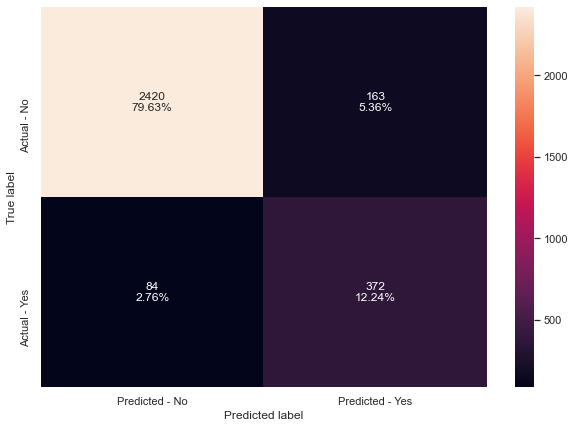

In [13]:

from scipy.stats import randint
rand_Dtree_pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"decisiontreeclassifier__max_depth": [3, None],
              "decisiontreeclassifier__max_features": randint(1, 9),
              "decisiontreeclassifier__min_samples_leaf": randint(1, 9),
              "decisiontreeclassifier__criterion": ["gini", "entropy"]}

scorer = metrics.make_scorer(metrics.precision_score)

rand_Dtree_cv = RandomizedSearchCV(rand_Dtree_pipe, param_dist, n_iter=50, cv=10)

rand_Dtree_cv.fit(X_train_res, y_train_res)


# Best Hyperparameter for DTree
rand_Dtree_best_params = rand_Dtree_cv.best_estimator_
print('Tuned Hyperparameters for RandomizedSearchCV DTree Classifier: ', rand_Dtree_best_params)

# Tune the model with best estimator
rand_Dtree_tuned = make_pipeline(StandardScaler(),rand_Dtree_best_params) 
rand_Dtree_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(rand_Dtree_tuned)
make_confusion_matrix(rand_Dtree_tuned, y_test)


### 5. Random Forest with pipeline and GridSearchCV

Tuned Hyperparameters for random forest Classifier:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.30000000000000004,
                                        min_samples_leaf=5, n_estimators=250,
                                        random_state=1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('randomforestclassifier',
                                  RandomForestClassifier(max_features=0.30000000000000004,
                                                         min_samples_leaf=5,
                                                         n_estimators=250,
                                                         random_state=1))]))])

Accuracy on training set :  0.9858916478555305
Accuracy on test set :  0.9512997696610728
Recall on training set :  0.9786507258753202
Recall on test set :  0.8947368421052632
Precision on training set :  0.9385749385749386
Precision on test set :  0.8031496062992126


[0.9858916478555305,
 0.9512997696610728,
 0.9786507258753202,
 0.8947368421052632,
 0.9385749385749386,
 0.8031496062992126]

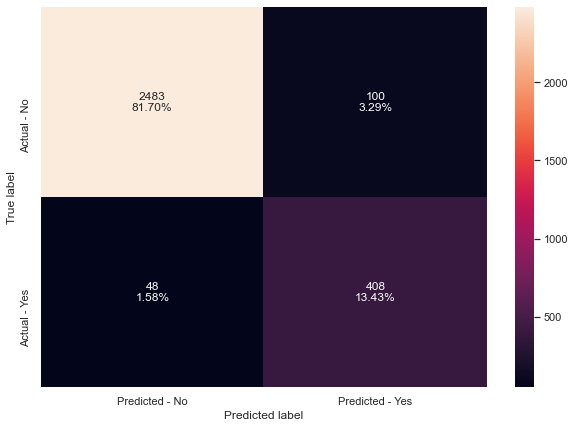

In [14]:

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Must include RandomForestClassifier__ before parameter names when doing gridsearch cv or randomizedcv
parameters = {"randomforestclassifier__n_estimators": [150,200,250],
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1)}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
rf_grid_obj = GridSearchCV(rf_pipe, parameters, scoring=acc_scorer,cv=5)
rf_grid_obj = rf_grid_obj.fit(X_train_res, y_train_res)

# Set the clf to the best combination of parameters
rf_estimator = rf_grid_obj.best_estimator_

print('Tuned Hyperparameters for random forest Classifier: ', rf_estimator)

# Tune the model with best estimator
rf_tuned = make_pipeline(StandardScaler(),rf_estimator) 
rf_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(rf_tuned)
make_confusion_matrix(rf_tuned, y_test)




### Random Forest Feature Importance

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30debe5d0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Marital_Status_Unknown'),
  Text(0, 2, 'Marital_Status_Divorced'),
  Text(0, 3, 'Dependent_count'),
  Text(0, 4, 'Income_Category'),
  Text(0, 5, 'Education_Level'),
  Text(0, 6, 'Contacts_Count_12_mon'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Months_on_book'),
  Text(0, 9, 'Months_Inactive_12_mon'),
  Text(0, 10, 'Gender_F'),
  Text(0, 11, 'Customer_Age'),
  Text(0, 12, 'Avg_Open_To_Buy'),
  Text(0, 13, 'Credit_Limit'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Avg_Utilization_Ratio'),
  Text(0, 18, 'Total_Relationship_Count'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

([<matplotlib.axis.YTick at 0x7fd30debe5d0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Marital_Status_Unknown'),
  Text(0, 2, 'Marital_Status_Divorced'),
  Text(0, 3, 'Dependent_count'),
  Text(0, 4, 'Income_Category'),
  Text(0, 5, 'Education_Level'),
  Text(0, 6, 'Contacts_Count_12_mon'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Months_on_book'),
  Text(0, 9, 'Months_Inactive_12_mon'),
  Text(0, 10, 'Gender_F'),
  Text(0, 11, 'Customer_Age'),
  Text(0, 12, 'Avg_Open_To_Buy'),
  Text(0, 13, 'Credit_Limit'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Avg_Utilization_Ratio'),
  Text(0, 18, 'Total_Relationship_Count'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

Text(0.5, 0, 'Relative Importance')

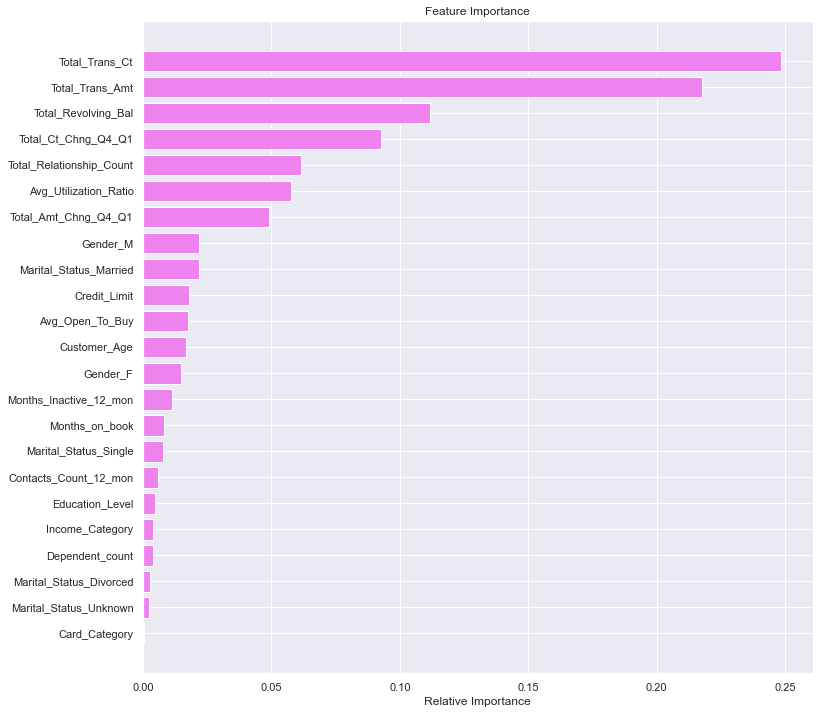

In [67]:
# rf_estimator feature importance

feature_importances = rf_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 6. Random Forest with pipeline and RandomizedSearchCV

Tuned Hyperparameters for random forest Classifier:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.32537366431769726,
                                        min_samples_split=0.016355952896618876,
                                        n_estimators=128, random_state=1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('randomforestclassifier',
                                  RandomForestClassifier(max_features=0.32537366431769726,
                                                         min_samples_split=0.016355952896618876,
                                                         n_estimators=128,
                                                         random_state=1))]))])

Accuracy on training set :  0.9504796839729119
Accuracy on test set :  0.937150378413952
Recall on training set :  0.9248505550811272
Recall on test set :  0.8969298245614035
Precision on training set :  0.8046062407132244
Precision on test set :  0.7396021699819169


[0.9504796839729119,
 0.937150378413952,
 0.9248505550811272,
 0.8969298245614035,
 0.8046062407132244,
 0.7396021699819169]

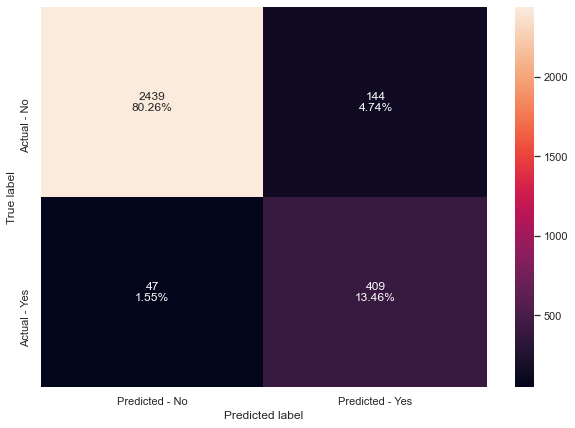

In [15]:

from scipy.stats import truncnorm, uniform

rand_rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# This must be a distribution, not random
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'randomforestclassifier__n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'randomforestclassifier__max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'randomforestclassifier__min_samples_split': uniform(0.01, 0.199)
}

# Type of scoring used to compare parameter combinations
acc_scorer =  metrics.make_scorer(metrics.precision_score)

# Run the grid search
rand_rf = RandomizedSearchCV(rand_rf_pipe, model_params, scoring=acc_scorer,n_iter=50, cv=5)
rand_rf = rand_rf.fit(X_train_res, y_train_res)

# Set the clf to the best combination of parameters
rand_rf_estimator = rand_rf.best_estimator_

print('Tuned Hyperparameters for random forest Classifier: ', rand_rf_estimator)

# Tune the model with best estimator
rand_rf_tuned = make_pipeline(StandardScaler(),rand_rf_estimator) 
rand_rf_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(rand_rf_tuned)
make_confusion_matrix(rand_rf_tuned, y_test)



### RandomizedSearchCV Random Forest Feature Importance

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30b5fbbd0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Marital_Status_Unknown'),
  Text(0, 2, 'Dependent_count'),
  Text(0, 3, 'Marital_Status_Divorced'),
  Text(0, 4, 'Education_Level'),
  Text(0, 5, 'Income_Category'),
  Text(0, 6, 'Months_on_book'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Contacts_Count_12_mon'),
  Text(0, 9, 'Months_Inactive_12_mon'),
  Text(0, 10, 'Avg_Open_To_Buy'),
  Text(0, 11, 'Gender_F'),
  Text(0, 12, 'Credit_Limit'),
  Text(0, 13, 'Customer_Age'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Total_Relationship_Count'),
  Text(0, 18, 'Avg_Utilization_Ratio'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

([<matplotlib.axis.YTick at 0x7fd30b5fbbd0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Marital_Status_Unknown'),
  Text(0, 2, 'Dependent_count'),
  Text(0, 3, 'Marital_Status_Divorced'),
  Text(0, 4, 'Education_Level'),
  Text(0, 5, 'Income_Category'),
  Text(0, 6, 'Months_on_book'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Contacts_Count_12_mon'),
  Text(0, 9, 'Months_Inactive_12_mon'),
  Text(0, 10, 'Avg_Open_To_Buy'),
  Text(0, 11, 'Gender_F'),
  Text(0, 12, 'Credit_Limit'),
  Text(0, 13, 'Customer_Age'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Total_Relationship_Count'),
  Text(0, 18, 'Avg_Utilization_Ratio'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

Text(0.5, 0, 'Relative Importance')

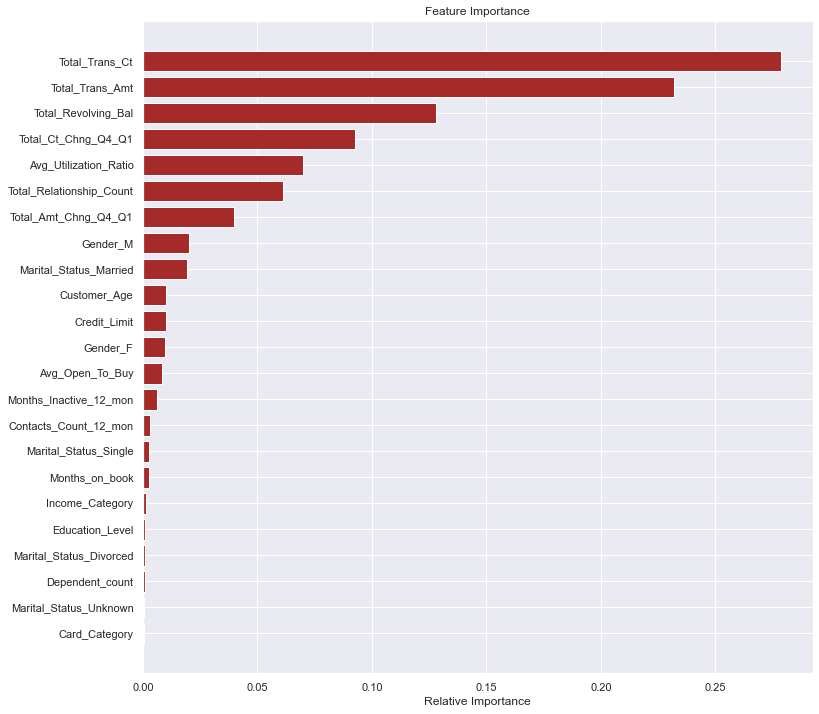

In [90]:
# rand_rf_estimator feature importance

feature_importances = rand_rf_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 7. Bagging Classifier with pipeline and GridSearchCV

Tuned Hyperparameters for random forest Classifier:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.2750496361870854,
                                        min_samples_split=0.015386422918987282,
                                        n_estimators=81, random_state=1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('randomforestclassifier',
                                  RandomForestClassifier(max_features=0.2750496361870854,
                                                         min_samples_split=0.015386422918987282,
                                                         n_estimators=81,
                                                         random_state=1))]))])

Accuracy on training set :  0.9538656884875847
Accuracy on test set :  0.9374794340243501
Recall on training set :  0.9248505550811272
Recall on test set :  0.8925438596491229
Precision on training set :  0.819213313161876
Precision on test set :  0.7427007299270073


[0.9538656884875847,
 0.9374794340243501,
 0.9248505550811272,
 0.8925438596491229,
 0.819213313161876,
 0.7427007299270073]

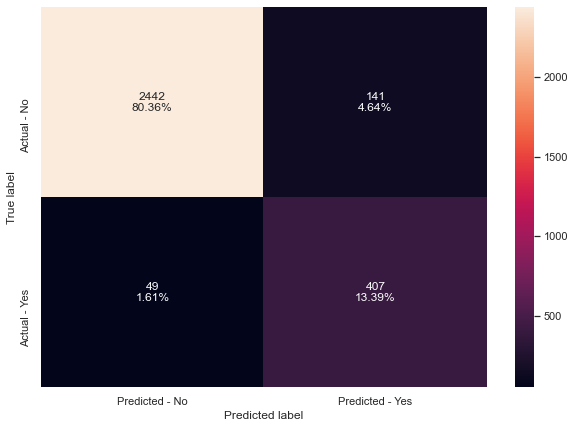

In [16]:

baggingClf_pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# This must be a distribution, not random
bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}

# Type of scoring used to compare parameter combinations
acc_scorer =  metrics.make_scorer(metrics.precision_score)

# Run the grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

baggingClf = GridSearchCV(baggingClf_pipe, bc_params, scoring=acc_scorer, cv=cv)
baggingClf = rand_rf.fit(X_train_res, y_train_res)

# Set the clf to the best combination of parameters
bc_best_estimator = baggingClf.best_estimator_

print('Tuned Hyperparameters for random forest Classifier: ', bc_best_estimator)

# Tune the model with best estimator
baggingClf_tuned = make_pipeline(StandardScaler(),bc_best_estimator) 
baggingClf_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(baggingClf_tuned)
make_confusion_matrix(baggingClf_tuned, y_test)




### Bagging Classifier feature_importances

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30db8e950>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Dependent_count'),
  Text(0, 2, 'Income_Category'),
  Text(0, 3, 'Marital_Status_Unknown'),
  Text(0, 4, 'Education_Level'),
  Text(0, 5, 'Marital_Status_Divorced'),
  Text(0, 6, 'Months_on_book'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Contacts_Count_12_mon'),
  Text(0, 9, 'Gender_F'),
  Text(0, 10, 'Customer_Age'),
  Text(0, 11, 'Avg_Open_To_Buy'),
  Text(0, 12, 'Months_Inactive_12_mon'),
  Text(0, 13, 'Credit_Limit'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Total_Relationship_Count'),
  Text(0, 18, 'Avg_Utilization_Ratio'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

([<matplotlib.axis.YTick at 0x7fd30db8e950>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Dependent_count'),
  Text(0, 2, 'Income_Category'),
  Text(0, 3, 'Marital_Status_Unknown'),
  Text(0, 4, 'Education_Level'),
  Text(0, 5, 'Marital_Status_Divorced'),
  Text(0, 6, 'Months_on_book'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Contacts_Count_12_mon'),
  Text(0, 9, 'Gender_F'),
  Text(0, 10, 'Customer_Age'),
  Text(0, 11, 'Avg_Open_To_Buy'),
  Text(0, 12, 'Months_Inactive_12_mon'),
  Text(0, 13, 'Credit_Limit'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Total_Relationship_Count'),
  Text(0, 18, 'Avg_Utilization_Ratio'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

Text(0.5, 0, 'Relative Importance')

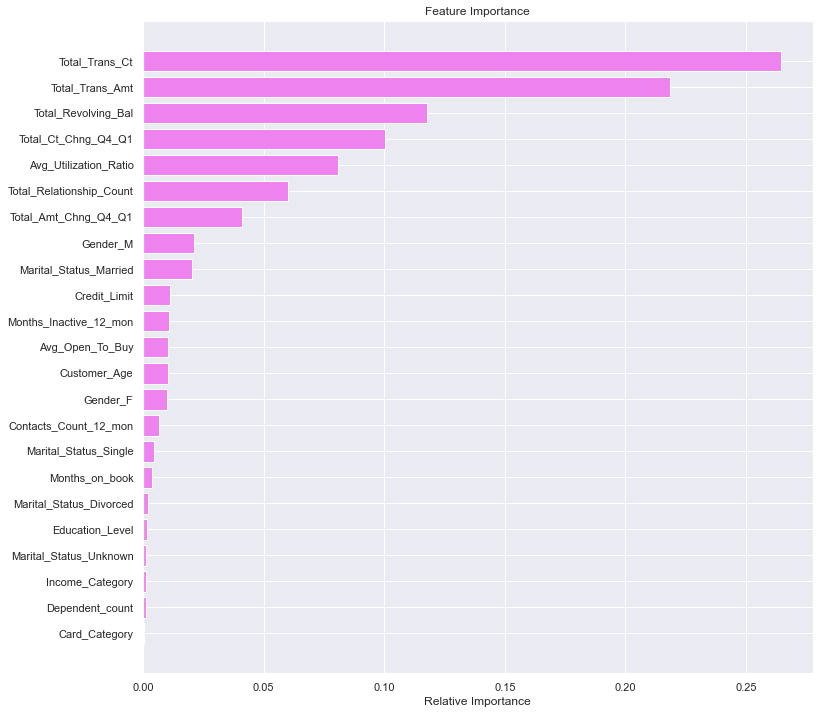

In [83]:
# Bagging Classifier feature_importances

feature_importances = bc_best_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### 8. Bagging Classifier with pipeline and RandomizedSearchCV

Tuned Hyperparameters for baggining Classifier:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.3372687782901826,
                                        min_samples_split=0.01964344734786236,
                                        n_estimators=38, random_state=1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('randomforestclassifier',
                                  RandomForestClassifier(max_features=0.2750496361870854,
                                                         min_samples_split=0.015386422918987282,
                                                         n_estimators=81,
                                                         random_state=1))]))])

Accuracy on training set :  0.9538656884875847
Accuracy on test set :  0.9374794340243501
Recall on training set :  0.9248505550811272
Recall on test set :  0.8925438596491229
Precision on training set :  0.819213313161876
Precision on test set :  0.7427007299270073


[0.9538656884875847,
 0.9374794340243501,
 0.9248505550811272,
 0.8925438596491229,
 0.819213313161876,
 0.7427007299270073]

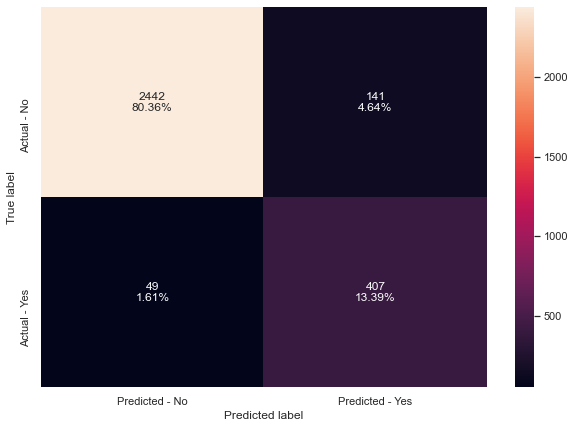

In [17]:

Rand_baggingClf_pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# This must be a distribution, not random
bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}

param_dist = {"baggingclassifier__max_depth": [3, None],
              "baggingclassifier__max_features": randint(1, 9),
              "baggingclassifier__min_samples_leaf": randint(1, 9),
              "baggingclassifier__criterion": ["gini", "entropy"]}


# Type of scoring used to compare parameter combinations
acc_scorer =  metrics.make_scorer(metrics.precision_score)

# Run the grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

rand_baggingClf = RandomizedSearchCV(Rand_baggingClf_pipe, param_dist, scoring=acc_scorer,n_iter=50, cv=cv)
rand_baggingClf = rand_rf.fit(X_train_res, y_train_res)

# Set the clf to the best combination of parameters
rand_bg_best_estimator = rand_baggingClf.best_estimator_

print('Tuned Hyperparameters for baggining Classifier: ', rand_bg_best_estimator)

# Tune the model with best estimator
rand_baggingClf_tuned = make_pipeline(StandardScaler(),bc_best_estimator) 
rand_baggingClf_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(rand_baggingClf_tuned)
make_confusion_matrix(rand_baggingClf_tuned, y_test)



### RandomizedCV Bagging Classifier feature_importances

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30c0e18d0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Income_Category'),
  Text(0, 2, 'Marital_Status_Divorced'),
  Text(0, 3, 'Dependent_count'),
  Text(0, 4, 'Marital_Status_Unknown'),
  Text(0, 5, 'Education_Level'),
  Text(0, 6, 'Months_on_book'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Contacts_Count_12_mon'),
  Text(0, 9, 'Avg_Open_To_Buy'),
  Text(0, 10, 'Customer_Age'),
  Text(0, 11, 'Months_Inactive_12_mon'),
  Text(0, 12, 'Credit_Limit'),
  Text(0, 13, 'Gender_F'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Total_Relationship_Count'),
  Text(0, 18, 'Avg_Utilization_Ratio'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

([<matplotlib.axis.YTick at 0x7fd30c0e18d0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Income_Category'),
  Text(0, 2, 'Marital_Status_Divorced'),
  Text(0, 3, 'Dependent_count'),
  Text(0, 4, 'Marital_Status_Unknown'),
  Text(0, 5, 'Education_Level'),
  Text(0, 6, 'Months_on_book'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Contacts_Count_12_mon'),
  Text(0, 9, 'Avg_Open_To_Buy'),
  Text(0, 10, 'Customer_Age'),
  Text(0, 11, 'Months_Inactive_12_mon'),
  Text(0, 12, 'Credit_Limit'),
  Text(0, 13, 'Gender_F'),
  Text(0, 14, 'Marital_Status_Married'),
  Text(0, 15, 'Gender_M'),
  Text(0, 16, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 17, 'Total_Relationship_Count'),
  Text(0, 18, 'Avg_Utilization_Ratio'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

Text(0.5, 0, 'Relative Importance')

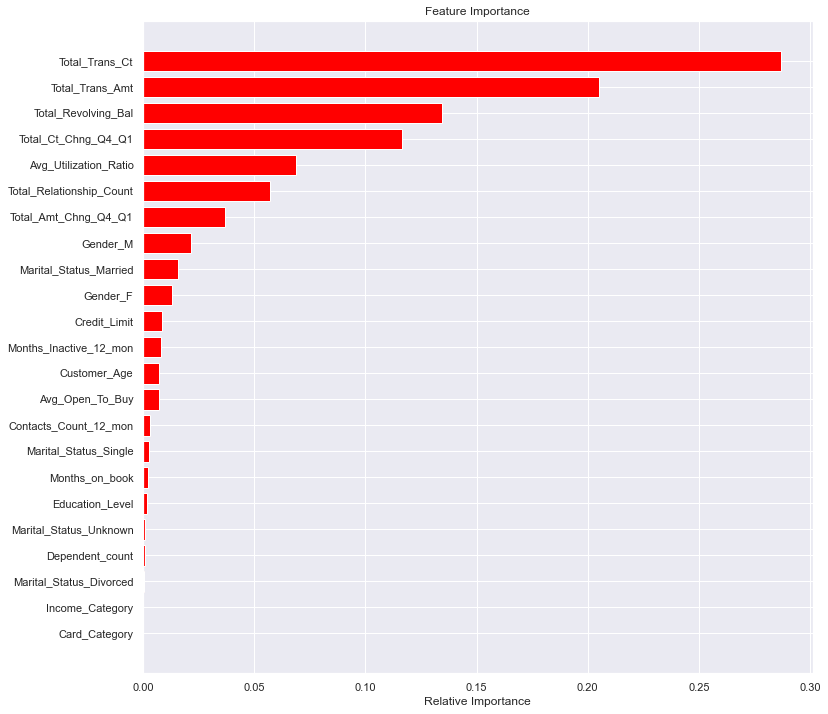

In [84]:
# Randomized Bagging Classifier feature_importances

feature_importances = rand_bg_best_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



### 9. Adaboost Classifier with pipeline and GridSearchCV

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=1))]),
             param_grid={'adaboostclassifier__base_estimator': [DecisionTreeClassifier(max_depth=3,
                                                                                       random_state=1),
                                                                DecisionTreeClassifier(max_depth=5,
                                                                                       random_state=1)],
                         'adaboostclassifier__learning_rate': [0.1, 0.01, 1],
                         'adaboostclassifier__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring=make_scorer(recall_score))

Tuned Hyperparameters for Adaboost Classifier:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=90,
                                    random_state=1))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('adaboostclassifier',
                                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                           random_state=1),
                                                     learning_rate=1,
                                                     n_estimators=90,
                                                     random_state=1))]))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9631457716354064
Recall on training set :  1.0
Recall on test set :  0.875
Precision on training set :  1.0
Precision on test set :  0.8788546255506607


[1.0, 0.9631457716354064, 1.0, 0.875, 1.0, 0.8788546255506607]

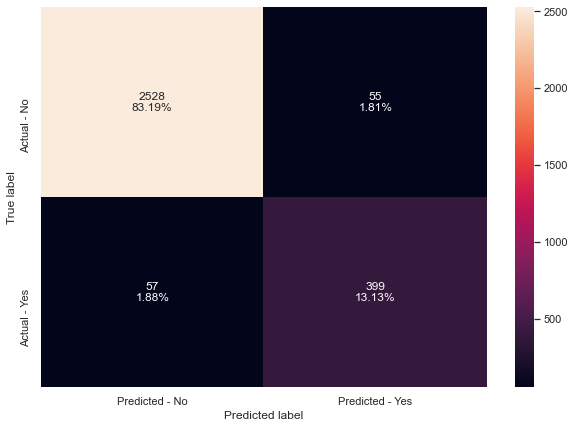

In [19]:

# Creating pipeline
Adaboostpipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 100, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=5, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer =  metrics.make_scorer(metrics.precision_score)

# Calling GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

Adaboostpipegrid_cv = GridSearchCV(estimator=Adaboostpipe, param_grid=param_grid, scoring=scorer, cv=cv)

# Fitting parameters in GridSeachCV
Adaboostpipegrid_cv.fit(X_train_res, y_train_res)


# Set the clf to the best combination of parameters
adaboost_best_estimator = Adaboostpipegrid_cv.best_estimator_

print('Tuned Hyperparameters for Adaboost Classifier: ', adaboost_best_estimator)

# Tune the model with best estimator
Adaboost_tuned = make_pipeline(StandardScaler(),adaboost_best_estimator) 
Adaboost_tuned.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(Adaboost_tuned)
make_confusion_matrix(Adaboost_tuned, y_test)


### Adaboost Feature Importance 


<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30bd3ffd0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Gender_F'),
  Text(0, 2, 'Gender_M'),
  Text(0, 3, 'Marital_Status_Single'),
  Text(0, 4, 'Dependent_count'),
  Text(0, 5, 'Marital_Status_Divorced'),
  Text(0, 6, 'Marital_Status_Unknown'),
  Text(0, 7, 'Income_Category'),
  Text(0, 8, 'Education_Level'),
  Text(0, 9, 'Marital_Status_Married'),
  Text(0, 10, 'Contacts_Count_12_mon'),
  Text(0, 11, 'Avg_Open_To_Buy'),
  Text(0, 12, 'Avg_Utilization_Ratio'),
  Text(0, 13, 'Months_Inactive_12_mon'),
  Text(0, 14, 'Credit_Limit'),
  Text(0, 15, 'Total_Relationship_Count'),
  Text(0, 16, 'Months_on_book'),
  Text(0, 17, 'Total_Revolving_Bal'),
  Text(0, 18, 'Customer_Age'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 21, 'Total_Trans_Ct'),
  Text(0, 22, 'Total_Trans_Amt')])

([<matplotlib.axis.YTick at 0x7fd30bd3ffd0>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Gender_F'),
  Text(0, 2, 'Gender_M'),
  Text(0, 3, 'Marital_Status_Single'),
  Text(0, 4, 'Dependent_count'),
  Text(0, 5, 'Marital_Status_Divorced'),
  Text(0, 6, 'Marital_Status_Unknown'),
  Text(0, 7, 'Income_Category'),
  Text(0, 8, 'Education_Level'),
  Text(0, 9, 'Marital_Status_Married'),
  Text(0, 10, 'Contacts_Count_12_mon'),
  Text(0, 11, 'Avg_Open_To_Buy'),
  Text(0, 12, 'Avg_Utilization_Ratio'),
  Text(0, 13, 'Months_Inactive_12_mon'),
  Text(0, 14, 'Credit_Limit'),
  Text(0, 15, 'Total_Relationship_Count'),
  Text(0, 16, 'Months_on_book'),
  Text(0, 17, 'Total_Revolving_Bal'),
  Text(0, 18, 'Customer_Age'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 21, 'Total_Trans_Ct'),
  Text(0, 22, 'Total_Trans_Amt')])

Text(0.5, 0, 'Relative Importance')

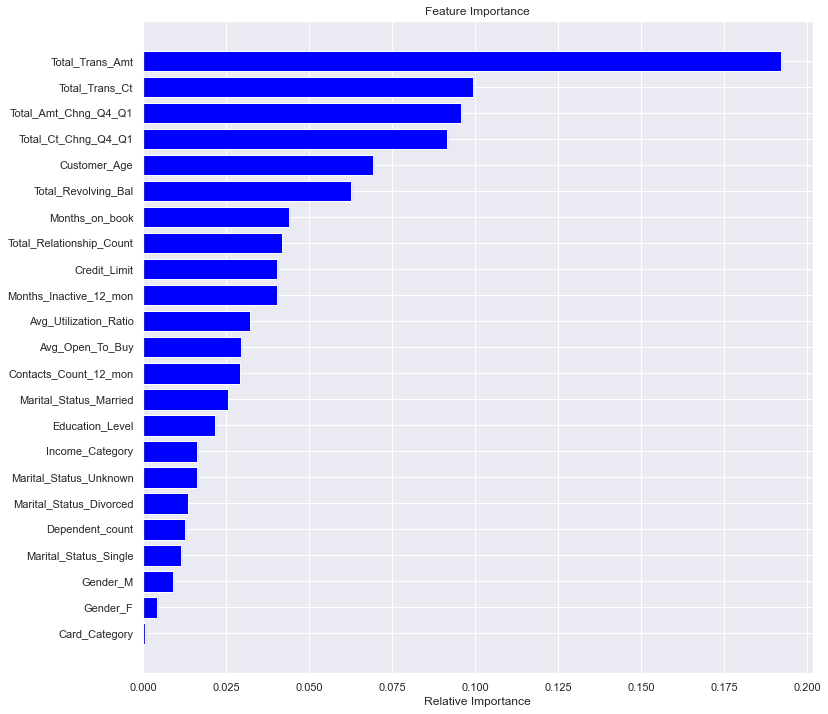

In [85]:
# adaboost feature importance 
feature_importances = adaboost_best_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 10. Adaboost Classifier with pipeline and RandomizedSearchCV

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('adaboostclassifier',
                                              AdaBoostClassifier(random_state=1))]),
                   n_iter=50,
                   param_distributions={'adaboostclassifier__base_estimator': [DecisionTreeClassifier(max_depth=1,
                                                                                                      random_state=1),
                                                                               DecisionTreeClassifier(max_depth=2,
                                                                                                      random_state=1),
                                                                               DecisionTreeClassifier(max_depth=3,
                

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=80,
                                    random_state=1))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9651201052977953
Recall on training set :  1.0
Recall on test set :  0.8881578947368421
Precision on training set :  1.0
Precision on test set :  0.8804347826086957


[1.0, 0.9651201052977953, 1.0, 0.8881578947368421, 1.0, 0.8804347826086957]

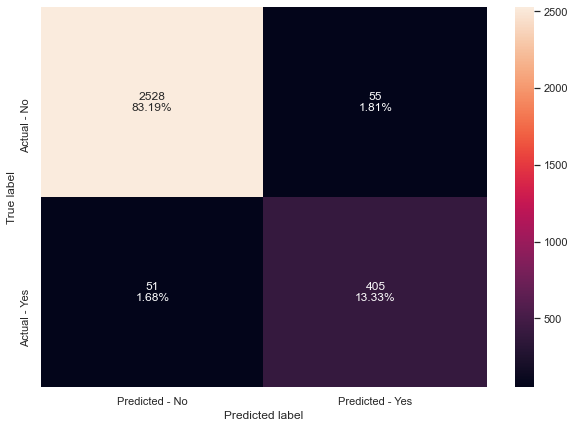

In [21]:

# Creating pipeline
rand_adaboost_pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 100, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],  
}
# Type of scoring used to compare parameter combinations
scorer =  metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
rand_adaboost_pipe_tuned = RandomizedSearchCV(estimator=rand_adaboost_pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=cv, random_state=1)
rand_adaboost_pipe_tuned.fit(X_train_res, y_train_res)

adaboost_best_estimator = rand_adaboost_pipe_tuned.best_estimator_


#Fitting parameters in RandomizedSearchCV
adaboost_best_estimator.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(adaboost_best_estimator)
make_confusion_matrix(adaboost_best_estimator, y_test)



### 11. XGBClassifier Classifier with pipeline and GridSearchCV

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(eval_metric='logloss',
                                                      random_state=1))]),
             param_grid={'xgbclassifier__gamma': [0, 1, 3],
                         'xgbclassifier__learning_rate': [0.01, 0.1, 1],
                         'xgbclassifier__n_estimators': array([ 50, 100, 150]),
                         'xgbclassifier__subsample': [0.2, 0.6, 1]},
             scoring=make_scorer(recall_score))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='logloss', gamma=1, n_estimators=150,
                               random_state=1, subsample=0.2))])

Accuracy on training set :  0.9724887133182845
Accuracy on test set :  0.9654491609081934
Recall on training set :  0.9342442356959864
Recall on test set :  0.9144736842105263
Precision on training set :  0.9026402640264026
Precision on test set :  0.8633540372670807


[0.9724887133182845,
 0.9654491609081934,
 0.9342442356959864,
 0.9144736842105263,
 0.9026402640264026,
 0.8633540372670807]

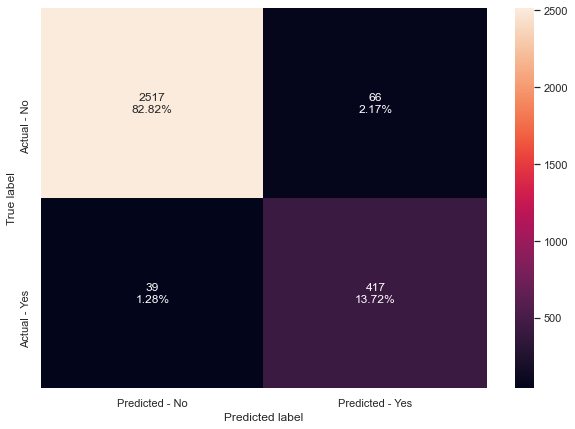

In [27]:

XGBpipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

param_grid={'xgbclassifier__n_estimators':np.arange(50,200,50),
            'xgbclassifier__learning_rate':[0.01,0.1,1], 
            'xgbclassifier__gamma':[0,1,3],
            'xgbclassifier__subsample':[0.2,0.6,1]}

# Type of scoring used to compare parameter combinations
scorer =  metrics.make_scorer(metrics.precision_score)

#Calling GridSearchCV
XGBgrid_cv = GridSearchCV(estimator=XGBpipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
XGBgrid_cv.fit(X_train_res, y_train_res)

XGBbest_estimator = XGBgrid_cv.best_estimator_

#Fitting parameters in RandomizedSearchCV
XGBbest_estimator.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(XGBbest_estimator)
make_confusion_matrix(XGBbest_estimator, y_test)




###  XGB feature importance 

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30d8f2f50>,
 [Text(0, 0, 'Months_on_book'),
  Text(0, 1, 'Card_Category'),
  Text(0, 2, 'Dependent_count'),
  Text(0, 3, 'Avg_Utilization_Ratio'),
  Text(0, 4, 'Contacts_Count_12_mon'),
  Text(0, 5, 'Avg_Open_To_Buy'),
  Text(0, 6, 'Credit_Limit'),
  Text(0, 7, 'Education_Level'),
  Text(0, 8, 'Income_Category'),
  Text(0, 9, 'Customer_Age'),
  Text(0, 10, 'Marital_Status_Divorced'),
  Text(0, 11, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 12, 'Months_Inactive_12_mon'),
  Text(0, 13, 'Marital_Status_Unknown'),
  Text(0, 14, 'Gender_F'),
  Text(0, 15, 'Total_Trans_Amt'),
  Text(0, 16, 'Marital_Status_Married'),
  Text(0, 17, 'Gender_M'),
  Text(0, 18, 'Marital_Status_Single'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Relationship_Count'),
  Text(0, 21, 'Total_Revolving_Bal'),
  Text(0, 22, 'Total_Trans_Ct')])

([<matplotlib.axis.YTick at 0x7fd30d8f2f50>,
 [Text(0, 0, 'Months_on_book'),
  Text(0, 1, 'Card_Category'),
  Text(0, 2, 'Dependent_count'),
  Text(0, 3, 'Avg_Utilization_Ratio'),
  Text(0, 4, 'Contacts_Count_12_mon'),
  Text(0, 5, 'Avg_Open_To_Buy'),
  Text(0, 6, 'Credit_Limit'),
  Text(0, 7, 'Education_Level'),
  Text(0, 8, 'Income_Category'),
  Text(0, 9, 'Customer_Age'),
  Text(0, 10, 'Marital_Status_Divorced'),
  Text(0, 11, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 12, 'Months_Inactive_12_mon'),
  Text(0, 13, 'Marital_Status_Unknown'),
  Text(0, 14, 'Gender_F'),
  Text(0, 15, 'Total_Trans_Amt'),
  Text(0, 16, 'Marital_Status_Married'),
  Text(0, 17, 'Gender_M'),
  Text(0, 18, 'Marital_Status_Single'),
  Text(0, 19, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 20, 'Total_Relationship_Count'),
  Text(0, 21, 'Total_Revolving_Bal'),
  Text(0, 22, 'Total_Trans_Ct')])

Text(0.5, 0, 'Relative Importance')

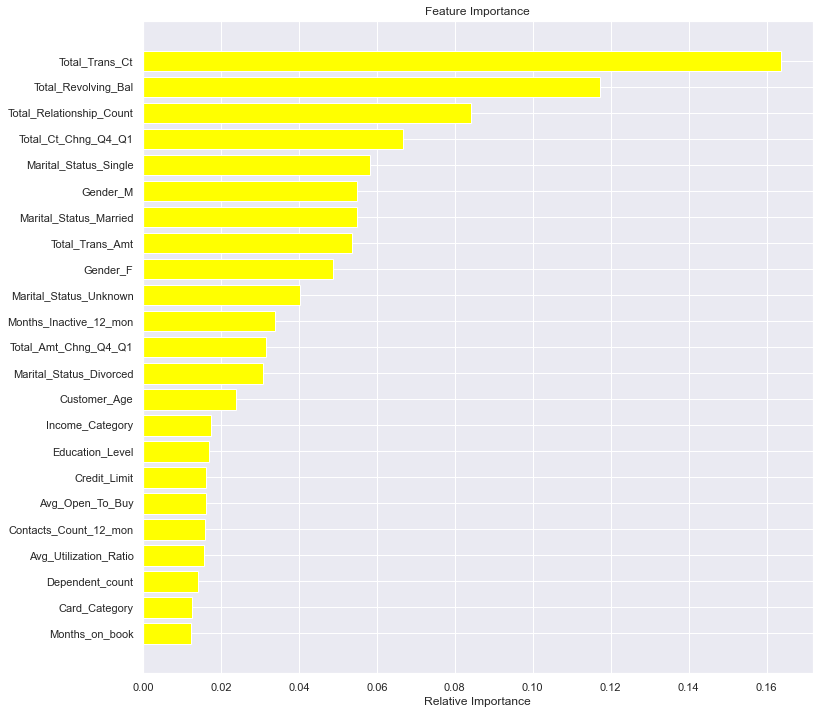

In [86]:
#  XGB feature importance 
feature_importances = XGBbest_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 12. XGBClassifier Classifier with pipeline and RandomizedSearchCV

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbclassifier',
                                              XGBClassifier(eval_metric='logloss',
                                                            n_estimators=10,
                                                            random_state=1))]),
                   param_distributions={'xgbclassifier__gamma': [0, 1, 5],
                                        'xgbclassifier__learning_rate': [0.01,
                                                                         0.1,
                                                                         1],
                                        'xgbclassifier__max_depth': array([1, 2, 3, 4]),
                                        'xgbclassifier__n_estimators': array([ 50

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='logloss', learning_rate=1,
                               max_depth=4, n_estimators=50, random_state=1,
                               reg_lambda=5))])

Accuracy on training set :  0.9990124153498872
Accuracy on test set :  0.9697268838433696
Recall on training set :  0.9982920580700256
Recall on test set :  0.9078947368421053
Precision on training set :  0.995741056218058
Precision on test set :  0.8922413793103449


[0.9990124153498872,
 0.9697268838433696,
 0.9982920580700256,
 0.9078947368421053,
 0.995741056218058,
 0.8922413793103449]

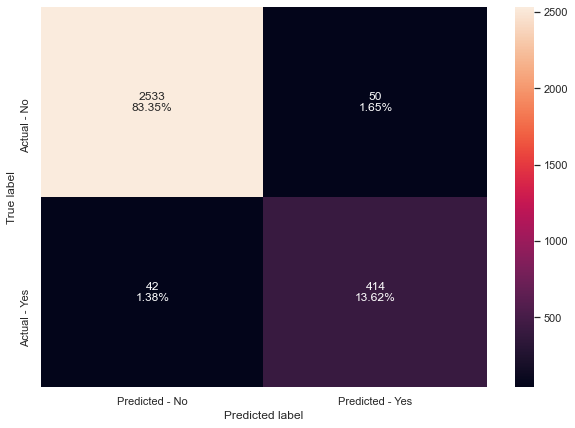

In [29]:

rand_XGBpipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 10))

param_grid={'xgbclassifier__n_estimators':np.arange(50,200,50),
            'xgbclassifier__scale_pos_weight':[0,1,2],
            'xgbclassifier__learning_rate':[0.01,0.1,1],
            'xgbclassifier__gamma':[0,1,5],
            'xgbclassifier__subsample':[0.1,0.5,1],
           'xgbclassifier__max_depth':np.arange(1,5,1),
            'xgbclassifier__reg_lambda':[1,5,10]}


# Type of scoring used to compare parameter combinations
scorer =  metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
XGBrandomized_cv = RandomizedSearchCV(estimator=rand_XGBpipe, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=cv, random_state=1)

#Fitting parameters in RandomizedSearchCV
XGBrandomized_cv.fit(X_train_res, y_train_res)

rand_XGBbest_estimator = XGBrandomized_cv.best_estimator_

#Fitting parameters in RandomizedSearchCV
rand_XGBbest_estimator.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(rand_XGBbest_estimator)
make_confusion_matrix(rand_XGBbest_estimator, y_test)


###  RandXGB feature importance 

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30b231710>,
 [Text(0, 0, 'Dependent_count'),
  Text(0, 1, 'Avg_Utilization_Ratio'),
  Text(0, 2, 'Card_Category'),
  Text(0, 3, 'Income_Category'),
  Text(0, 4, 'Months_on_book'),
  Text(0, 5, 'Credit_Limit'),
  Text(0, 6, 'Contacts_Count_12_mon'),
  Text(0, 7, 'Education_Level'),
  Text(0, 8, 'Avg_Open_To_Buy'),
  Text(0, 9, 'Customer_Age'),
  Text(0, 10, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 11, 'Gender_F'),
  Text(0, 12, 'Months_Inactive_12_mon'),
  Text(0, 13, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 14, 'Gender_M'),
  Text(0, 15, 'Total_Trans_Amt'),
  Text(0, 16, 'Marital_Status_Single'),
  Text(0, 17, 'Marital_Status_Married'),
  Text(0, 18, 'Total_Relationship_Count'),
  Text(0, 19, 'Total_Revolving_Bal'),
  Text(0, 20, 'Marital_Status_Divorced'),
  Text(0, 21, 'Marital_Status_Unknown'),
  Text(0, 22, 'Total_Trans_Ct')])

([<matplotlib.axis.YTick at 0x7fd30b231710>,
 [Text(0, 0, 'Dependent_count'),
  Text(0, 1, 'Avg_Utilization_Ratio'),
  Text(0, 2, 'Card_Category'),
  Text(0, 3, 'Income_Category'),
  Text(0, 4, 'Months_on_book'),
  Text(0, 5, 'Credit_Limit'),
  Text(0, 6, 'Contacts_Count_12_mon'),
  Text(0, 7, 'Education_Level'),
  Text(0, 8, 'Avg_Open_To_Buy'),
  Text(0, 9, 'Customer_Age'),
  Text(0, 10, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 11, 'Gender_F'),
  Text(0, 12, 'Months_Inactive_12_mon'),
  Text(0, 13, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 14, 'Gender_M'),
  Text(0, 15, 'Total_Trans_Amt'),
  Text(0, 16, 'Marital_Status_Single'),
  Text(0, 17, 'Marital_Status_Married'),
  Text(0, 18, 'Total_Relationship_Count'),
  Text(0, 19, 'Total_Revolving_Bal'),
  Text(0, 20, 'Marital_Status_Divorced'),
  Text(0, 21, 'Marital_Status_Unknown'),
  Text(0, 22, 'Total_Trans_Ct')])

Text(0.5, 0, 'Relative Importance')

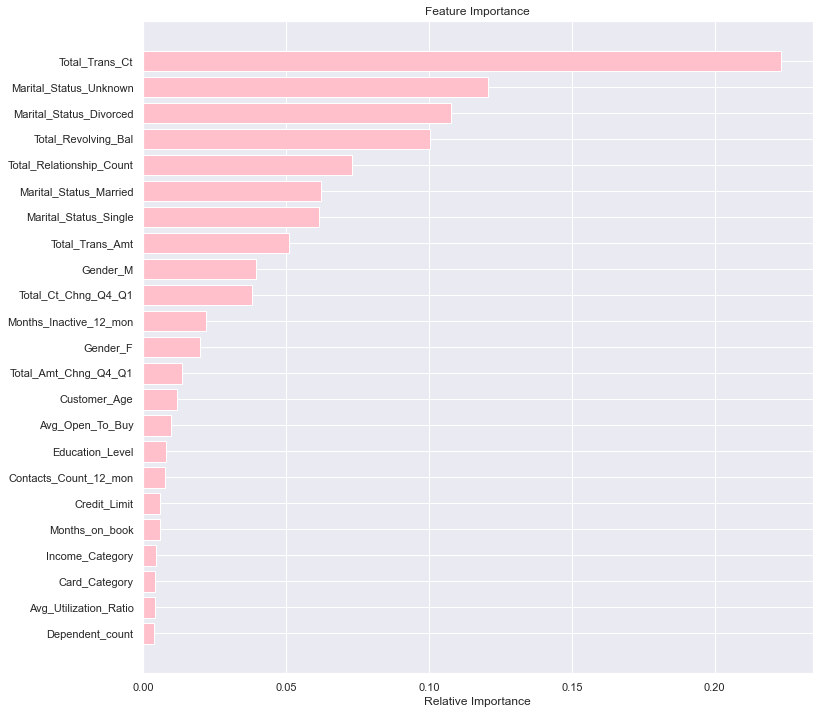

In [87]:
#  RandXGB feature importance 
feature_importances = rand_XGBbest_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 13. GradientBoostingClassifier Classifier with pipeline and GridSearchCV


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=1))]),
             param_grid={'gradientboostingclassifier__learning_rate': [0.01,
                                                                       0.001,
                                                                       0.1, 1],
                         'gradientboostingclassifier__max_depth': [3, 8],
                         'gradientboostingclassifier__max_features': ['log2',
                                                                      'sqrt'],
                         'gradientboostingclassifier__min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'gradientboostingclassifier__min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'gradientboostingclassifier__n_estimators

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=1, max_depth=8,
                                            max_features='log2',
                                            min_samples_leaf=0.1,
                                            min_samples_split=0.1,
                                            n_estimators=10, random_state=1))])

Accuracy on training set :  0.9053329571106095
Accuracy on test set :  0.8868048700230339
Recall on training set :  0.8249359521776259
Recall on test set :  0.7763157894736842
Precision on training set :  0.6745810055865922
Precision on test set :  0.5939597315436241


[0.9053329571106095,
 0.8868048700230339,
 0.8249359521776259,
 0.7763157894736842,
 0.6745810055865922,
 0.5939597315436241]

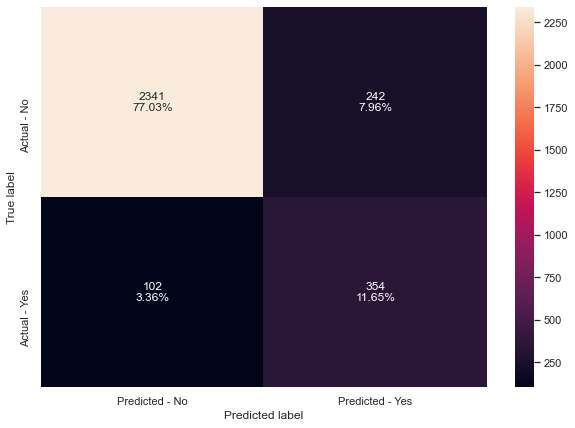

In [40]:

GradBoostingpipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

parameters={
    "gradientboostingclassifier__learning_rate": [0.01, 0.001, 0.1, 1],
    "gradientboostingclassifier__min_samples_split": np.linspace(0.1, 0.5, 5),
    "gradientboostingclassifier__min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "gradientboostingclassifier__max_depth":[3, 8],
    "gradientboostingclassifier__max_features":["log2","sqrt"],
    "gradientboostingclassifier__subsample":[0.5, 1.0],
    "gradientboostingclassifier__n_estimators":[10]
    }

# Type of scoring used to compare parameter combinations
scorer =  metrics.make_scorer(metrics.precision_score)

#Calling GridSearchCV
GradBoosting_cv = GridSearchCV(estimator=GradBoostingpipe, param_grid=parameters,
                               scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
GradBoosting_cv.fit(X_train_res, y_train_res)

GradBoosting_estimator = GradBoosting_cv.best_estimator_

#Fitting parameters in RandomizedSearchCV
GradBoosting_estimator.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(GradBoosting_estimator)
make_confusion_matrix(GradBoosting_estimator, y_test)



### 14. GradientBoostingClassifier Classifier with pipeline and RandomizedSearchCV


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier(random_state=1))]),
                   param_distributions={'gradientboostingclassifier__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd30cc4db10>,
                                        'gradientboostingclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd30cc4d850>,
                                        'gradientboostingclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd30cc4d790>,
                                        'gradientboostingclassifier__subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd30c0b6890>},
                   scoring=make_scorer(recall_score))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.06493981403511584,
                                            max_depth=6, n_estimators=465,
                                            random_state=1,
                                            subsample=0.6242222890528385))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9733464955577492
Recall on training set :  1.0
Recall on test set :  0.9100877192982456
Precision on training set :  1.0
Precision on test set :  0.9120879120879121


[1.0, 0.9733464955577492, 1.0, 0.9100877192982456, 1.0, 0.9120879120879121]

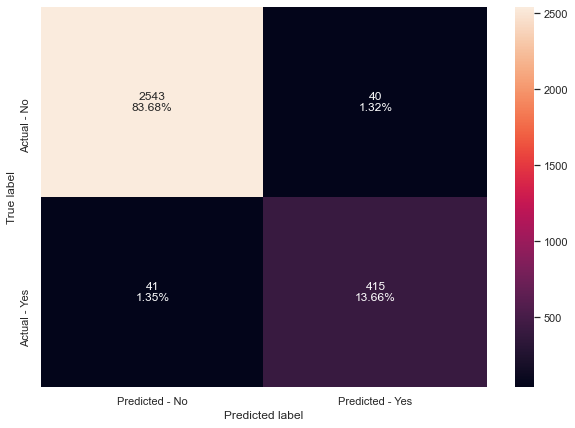

In [49]:

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
    
RanGradBoostingpipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

parameters = {'gradientboostingclassifier__learning_rate': sp_randFloat(),
                  'gradientboostingclassifier__subsample'    : sp_randFloat(),
                  'gradientboostingclassifier__n_estimators' : sp_randInt(100, 1000),
                  'gradientboostingclassifier__max_depth'    : sp_randInt(4, 10) 
                 }

# Type of scoring used to compare parameter combinations
scorer =  metrics.make_scorer(metrics.precision_score)

#Calling RandomizedSearchCV
RanGradBoosting_cv = RandomizedSearchCV(estimator=RanGradBoostingpipe, param_distributions=parameters, 
                               scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
RanGradBoosting_cv.fit(X_train_res, y_train_res)

RandGradBoosting_estimator = RanGradBoosting_cv.best_estimator_

#Fitting parameters in RandomizedSearchCV
RandGradBoosting_estimator.fit(X_train_res, y_train_res)

# Scores and Confusion matrix
get_metrics_score(RandGradBoosting_estimator)
make_confusion_matrix(RandGradBoosting_estimator, y_test)


### GradientBoostingClassifier feature importance 



<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7fd30b4a8250>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Income_Category'),
  Text(0, 2, 'Dependent_count'),
  Text(0, 3, 'Marital_Status_Divorced'),
  Text(0, 4, 'Gender_F'),
  Text(0, 5, 'Education_Level'),
  Text(0, 6, 'Marital_Status_Unknown'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Months_on_book'),
  Text(0, 9, 'Avg_Utilization_Ratio'),
  Text(0, 10, 'Contacts_Count_12_mon'),
  Text(0, 11, 'Months_Inactive_12_mon'),
  Text(0, 12, 'Marital_Status_Married'),
  Text(0, 13, 'Gender_M'),
  Text(0, 14, 'Avg_Open_To_Buy'),
  Text(0, 15, 'Credit_Limit'),
  Text(0, 16, 'Customer_Age'),
  Text(0, 17, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 18, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 19, 'Total_Relationship_Count'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

([<matplotlib.axis.YTick at 0x7fd30b4a8250>,
 [Text(0, 0, 'Card_Category'),
  Text(0, 1, 'Income_Category'),
  Text(0, 2, 'Dependent_count'),
  Text(0, 3, 'Marital_Status_Divorced'),
  Text(0, 4, 'Gender_F'),
  Text(0, 5, 'Education_Level'),
  Text(0, 6, 'Marital_Status_Unknown'),
  Text(0, 7, 'Marital_Status_Single'),
  Text(0, 8, 'Months_on_book'),
  Text(0, 9, 'Avg_Utilization_Ratio'),
  Text(0, 10, 'Contacts_Count_12_mon'),
  Text(0, 11, 'Months_Inactive_12_mon'),
  Text(0, 12, 'Marital_Status_Married'),
  Text(0, 13, 'Gender_M'),
  Text(0, 14, 'Avg_Open_To_Buy'),
  Text(0, 15, 'Credit_Limit'),
  Text(0, 16, 'Customer_Age'),
  Text(0, 17, 'Total_Amt_Chng_Q4_Q1'),
  Text(0, 18, 'Total_Ct_Chng_Q4_Q1'),
  Text(0, 19, 'Total_Relationship_Count'),
  Text(0, 20, 'Total_Revolving_Bal'),
  Text(0, 21, 'Total_Trans_Amt'),
  Text(0, 22, 'Total_Trans_Ct')])

Text(0.5, 0, 'Relative Importance')

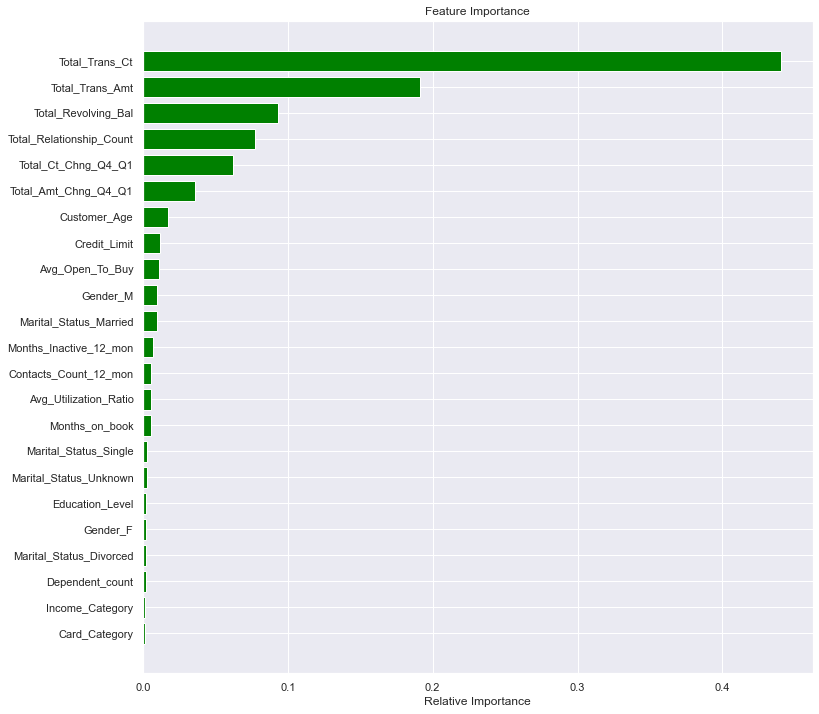

In [89]:
feature_importances = RandGradBoosting_estimator.steps[1][1].feature_importances_
indices  = np.argsort(feature_importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing Models Performances

In [102]:

all_models = [log_reg_tuned, rand_logistic_tuned_pipe,
              Dtree_tuned, rand_Dtree_tuned,
            rf_tuned,  rand_rf_tuned, 
            baggingClf_tuned, rand_baggingClf_tuned, 
             Adaboost_tuned,adaboost_best_estimator, 
              XGBbest_estimator,
             rand_XGBbest_estimator,
             GradBoosting_estimator,
            RandGradBoosting_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in all_models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

    
# Put everything in a dataframe
comprison = pd.DataFrame(
{
    'Model':['Logistic GridSearchCV', 'Logistic RandomizedGridSearchCV',
             'DTree GridSearchCV', 'DTree RandomizedGridSearchCV',
             'RF GridSearchCV','RF RandomizedGridSearchCV',
             'Bagging GridSearchCV','Bagging RandomizedGridSearchCV',
             'Adaboost GridSearchCV', 'Adaboost RandomizedGridSearchCV',
             'XGB GridSearchCV', 'XGB RandomizedGridSearchCV',
             'GradBoosting GridSearchCV','GradBoosting RandomizedGridSearchCV'
             ],
    'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})

coparison_final = comprison.sort_values(["Test_Precision"], ascending = False)
coparison_final

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
13,GradBoosting RandomizedGridSearchCV,1.00,0.97,1.00,0.91,1.00,0.91
11,XGB RandomizedGridSearchCV,1.00,0.97,1.00,0.91,1.00,0.89
8,Adaboost GridSearchCV,1.00,0.96,1.00,0.88,1.00,0.88
9,Adaboost RandomizedGridSearchCV,1.00,0.97,1.00,0.89,1.00,0.88
10,XGB GridSearchCV,0.97,0.97,0.93,0.91,0.90,0.86
4,RF GridSearchCV,0.99,0.95,0.98,0.89,0.94,0.80
5,RF RandomizedGridSearchCV,0.95,0.94,0.92,0.90,0.80,0.74
6,Bagging GridSearchCV,0.95,0.94,0.92,0.89,0.82,0.74
7,Bagging RandomizedGridSearchCV,0.95,0.94,0.92,0.89,0.82,0.74
3,DTree RandomizedGridSearchCV,1.00,0.92,1.00,0.82,1.00,0.70


 ### Insights:
 
 - Test accuracy metric seems to perform well for all models, ranging from 0.76 to 0.89. The high level of accuracy ,however, is not a good measure of identifying cutsomers due to the severe class imbalance in the target variable customers. 
  
- Precision is a good measure here, because The Thera bank should aim at  finding customers who might churn. 

- The Precision metric for the training set overfits the data for GradBoosting, XGB, and Adaboost models. At the same time, it performs poorly on both the training and testing datasets for Decision Tree, Logistic regression, and Gradient Boost models. 


- The Precision metric for Random forest RandomizedGridSearchCV model performs well for both precision in the training and the testing dataset, with 0.80 and 0.74 respectivley. The precision recall does not overfit a lot and the test precision is high. Similarly, Bagging RandomizedGridSearchCV performs really well on both test and train precisions. 


- The analysis suggests that The Thera bank can use Random forest RandomizedGridSearchCV and Bagging RandomizedGridSearchCV models to predict whether a customer will churn.


- The company should take into consideration the following factors when determining advertising costs and customer segmentation: transaction amount and total revolving balance, relationship counts, and average utilization ratio.


- The compnay should also consider trying additional models tuning analysis or add new models such as logistic regression, or neural networks for future insights. 